# The Sparks Foundation GRIP

# Task 2(Data Science and Business Analytics)

# Prediction using Supervised Learning

# Name: Kalyani Gawande

# December'20 GRIP batch

**In this task we will predict the optimum number of  clusters and represent it visually by using Iris dataset.** 

In [139]:
# Importing the libraries
from sklearn import datasets
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

# Initializaion stage

 **Creating DataFrame Structure**

In [125]:
#Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [126]:
df = pd.DataFrame({
    'x': iris.data[:,0],
    'y': iris.data[:,1],
    'cluster' : iris.target
})

In [127]:
df

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


**Finding cendroids**

In [128]:
centroids ={}

for i in range(3):
    result_list = []
    result_list.append(df.loc[df['cluster'] == i]['x'].mean())
    result_list.append(df.loc[df['cluster'] == i]['y'].mean())
    
    centroids[i] = result_list
    
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

**Plotting points**

Text(0, 0.5, 'Sepal Width')

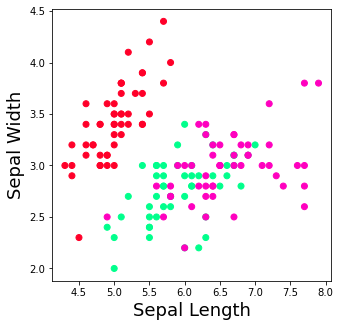

In [129]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],c=iris.target,cmap='gist_rainbow')
plt.xlabel('Sepal Length',fontsize=18)
plt.ylabel('Sepal Width',fontsize=18)

**Defining colors and plotting centroids for all clusters**

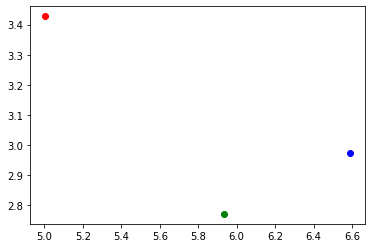

In [130]:
colmap = {0:'r',1:'g',2:'b'}
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],color=colmap[i])
plt.show()

**Elbow method**

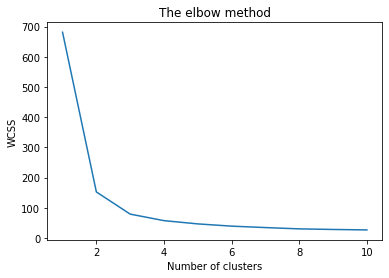

In [140]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# Assignment stage

**Calculating distance and updating Dataframe**

In [132]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df


In [133]:
df = assignment(df, centroids)

In [141]:
df

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.118406,1.051594,1.764836,0,r
1,4.9,3.0,0,0.440931,0.926140,1.914215,0,r
2,4.7,3.2,0,0.381602,1.187514,2.116492,0,r
3,4.6,3.1,0,0.521939,1.242335,2.212913,0,r
4,5.0,3.6,0,0.172105,1.192508,1.887407,0,r
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.976130,0.135136,2,b
146,6.3,2.5,2,1.592363,0.560492,0.770028,1,g
147,6.5,3.0,2,1.554098,0.788837,0.321509,2,b
148,6.2,3.4,2,1.194328,0.826107,0.693868,2,b


# Update stage

In [142]:
#updating the centroids
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest']== i]['x'])
        centroids[i][1] = np.mean(df[df['closest']== i]['y'])
    return k   

In [143]:
centroids = update(centroids)
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.773584905660377, 2.692452830188679],
 2: [6.812765957446806, 3.0744680851063824]}

**Visualising the graph**

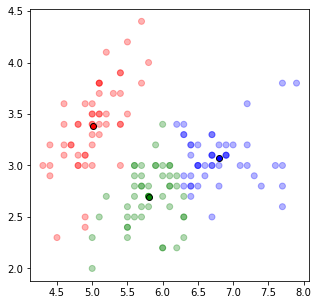

In [137]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'],df['y'],color=df['color'],alpha = 0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i],edgecolor='k')
plt.show()

In [144]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals (df['closest']):
        break

# Final result

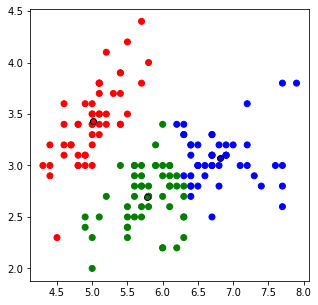

In [123]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'],df['y'],color=df['color'])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],color=colmap[i],edgecolor='k')
plt.show()